<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018


En este notebook se aborda el tema de aprendizaje de máquina para clasificación binaria utilizando Regresión Logística:
1. Propagación hacia adelante (forward propagation)
2. Función de pérdida
3. Función de costo
4. Descenso del gradiente
5. Predicción

<hr>
# 1. Propagación hacia adelante (backward propagation)

In [2]:
import numpy as np

In [3]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [4]:
seed = 2
np.random.seed(2)
z = np.random.randn(1,3)
print(sigmoid(z))

[[ 0.39729283  0.485937    0.10562821]]


In [5]:
def linear_activation(W, b, X):
    z = np.dot(W.T,X) + b
    
    return z

In [6]:
X = np.array([[1,2,3],[4,5,6]]).T
print("X: ",X)

Y = np.array([[0, 1]])
print("Y: ", Y)

W = np.array([[0.4], [-0.5], [0.01]])
print("W: ", W)

b = 0.3
print("b: ", b)

A = sigmoid(linear_activation(W, b, X))

print("forward propagation: ", A)

('X: ', array([[1, 4],
       [2, 5],
       [3, 6]]))
('Y: ', array([[0, 1]]))
('W: ', array([[ 0.4 ],
       [-0.5 ],
       [ 0.01]]))
('b: ', 0.3)
('forward propagation: ', array([[ 0.4329071 ,  0.36818758]]))


<hr>
# 2. Función de perdida

In [7]:
def loss(y, a):
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [8]:
seed = 2 #to be able to verify your result
np.random.seed(seed)
W = np.random.randn(2,1)
b = np.random.rand()
X = np.random.randn(2, 3)

Y = np.array([[1,1,0]]) #original labels for features X
A = sigmoid(linear_activation(W,b,X)) #forward activation

print("Perdida dato a dato: ", loss(Y, A))

('Perdida dato a dato: ', array([[ 0.22068428,  0.24198147,  1.27491702]]))


<hr>
# 3. Función de costo

In [9]:
def cost(logloss):
    return np.mean(logloss)

In [10]:
logloss = np.array([[0.22068428,  0.24198147,  1.27491702]])
print("costo: ", cost(logloss))

('costo: ', 0.57919425666666668)


<hr>
# 4. Descenso del gradiente (Gradient Descent) 

In [11]:
seed = 2
np.random.seed(seed)

X = np.random.rand(3,2)
Y = np.array([[0, 1]])

m = X.shape[1]

W = np.array([[0.1], [-0.1], [0.01]])
b = 0.1

print("m: ", m)
print("W inicial: ",W)
print("b inicial: ",b)

('m: ', 2)
('W inicial: ', array([[ 0.1 ],
       [-0.1 ],
       [ 0.01]]))
('b inicial: ', 0.1)


In [12]:
learning_rate = 0.05

for i in range(1000): #1000 iteraciones del descenso del gradiente
    Z = linear_activation(W,b,X)
    A = sigmoid(Z)
    dz = A - Y
    dW = np.dot(X,dz.T) / m
    db = np.sum(dz) / m
    J = cost(loss(Y,A))
    W -= learning_rate * dW
    b -= learning_rate * db
    
    if(i%100 == 0):
        print("costo: ", J)

print("W actualizado: ",W)
print("b actualizado: ",b)
print("costo total: ", J)

('costo: ', 0.7015469904820788)
('costo: ', 0.64689871140177202)
('costo: ', 0.60229866112170505)
('costo: ', 0.56214082904387985)
('costo: ', 0.52583854084244652)
('costo: ', 0.4929752680198537)
('costo: ', 0.46317799905372303)
('costo: ', 0.43611256330020032)
('costo: ', 0.41148118437711673)
('costo: ', 0.38901958210179133)
('W actualizado: ', array([[-3.67551521],
       [-0.66135148],
       [-0.44629981]]))
('b actualizado: ', 1.2478368169371263)
('costo total: ', 0.3686902335639759)


# 5. Predicción

La predicción consiste en aplicar forward propagation utilizando los W y b optimizados mediante descenso del gradiente.

In [13]:
def predict(W,b,X):
    z = linear_activation(W,b,X)
    A = sigmoid(z)
    return np.round(A)

In [14]:
Y_hat = predict(W,b,X)
print("predicciones: ",np.round(Y_hat))
print("clases originales: ", Y)

('predicciones: ', array([[ 0.,  1.]]))
('clases originales: ', array([[0, 1]]))


<hr>
# Regresión Logística sobre un dataset

In [15]:
from utils import generate_data, visualize, plot_decision_boundary
import matplotlib.pyplot as plt

In [16]:
X, Y = generate_data('blobs')
Y = Y.reshape(1,len(Y))
print(X.shape)
print(Y.shape)

(100, 2)
(1, 100)


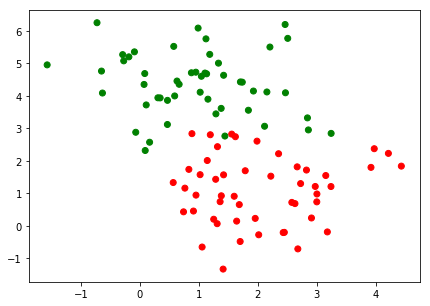

In [17]:
color= ['red' if y == 1 else 'green' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

In [28]:
#1. inicilicemos parametros W y b
m = X.shape[1]

W = np.random.randn(X.shape[0],1)
b = 0

print("m: ", m)
print("W inicial: ",W)
print("b inicial: ",b)

('m: ', 100)
('W inicial: ', array([[ 0.97873798],
       [ 2.2408932 ]]))
('b inicial: ', 0)


In [30]:
#2. Regresion logistica mediante descenso del gradiente

learning_rate = 0.1

for i in range(10000): #1000 iteraciones del descenso del gradiente
    Z = linear_activation(W,b,X)
    A = sigmoid(Z)
    dz = A - Y
    dW = np.dot(X,dz.T) / m
    db = np.sum(dz) / m
    J = np.sum(-(Y * np.log(A) + (1-Y)*np.log(1-A))) / m
    
    W -= learning_rate * dW
    b -= learning_rate * db
    
    if(i%1000 == 0):
        print("costo: ", J)

print("W actualizado: ",W)
print("b actualizado: ",b)
print("costo final (error), despues de ",i+1," iteraciones: ", J)

('costo: ', 0.10099947139724363)
('costo: ', 0.10026119792104077)
('costo: ', 0.09965101539485037)
('costo: ', 0.09914013721464747)
('costo: ', 0.098707707487412102)
('costo: ', 0.098338248018012081)
('costo: ', 0.09802003275224741)
('costo: ', 0.097744018666864815)
('costo: ', 0.097503122669030301)
('costo: ', 0.097291720428625994)
('W actualizado: ', array([[ 0.58414478],
       [-4.13316978]]))
('b actualizado: ', 10.297995547123222)
('costo final (error), despues de ', 10000, ' iteraciones: ', 0.097105466715801309)


In [31]:
print(predict(W,b,X))

[[ 1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.
   1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.
   1.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  0.  0.
   1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.
   1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.
   1.  1.  1.  1.  0.  0.  1.  1.  0.  1.]]


In [32]:
def visualize_lr(W, b, X, y):
    X = X.T
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = pred_func(W,b,np.c_[xx.ravel(), yy.ravel()])
    Z = predict(W,b,np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

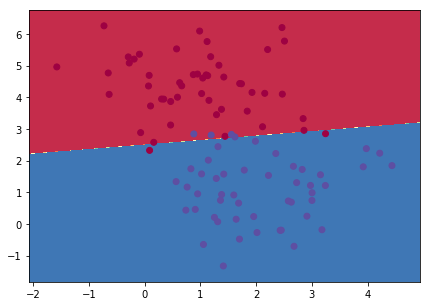

In [33]:
visualize_lr(W, b, X, Y)